Tommaso Peritore

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Solution

In [2]:
# problem parameters

# function we are trying to fit with the DNN
# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

# generate training parameters
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.2
bach_size = 64

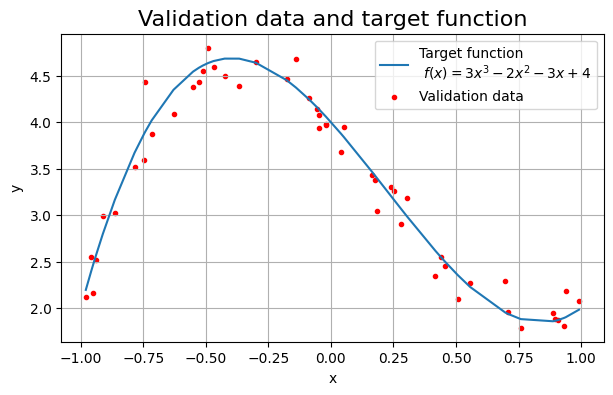

In [3]:
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (7,4))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

In [32]:
model = tf.keras.Sequential()
# activation: relu-si, elu-ni, exponential-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no
act = 'relu' 
model.add(Dense(32, input_shape = (1,), activation = act))
model.add(Dense(16, activation = act))
model.add(Dense(1, activation = act))

model.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])

# Get a summary of our composed model
model.summary()

# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training pairs.
# The optimizer finds the best weights minimizing the Mean Square Error loss function 

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                64        
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 0s 2ms/step - loss: 10.6382 - mse: 10.6382 - val_loss: 8.6353 - val_mse: 8.6353
Epoch 2/30
32/32 [==============================] - 0s 879us/step - loss: 7.7192 - mse: 7.7192 - val_loss: 5.3439 - val_mse: 5.3439
Epoch 3/30
32/32 [======

In [33]:
print("Results")
w = model.get_weights()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

Results
TEST DATA evaluation
Test loss:      0.07657785713672638
Test accuracy:  0.07657785713672638

EXACT CURVE evaluation
Test loss:      0.042026251554489136
Test accuracy:  0.042026251554489136


4/4 [==============================] - 0s 663us/step


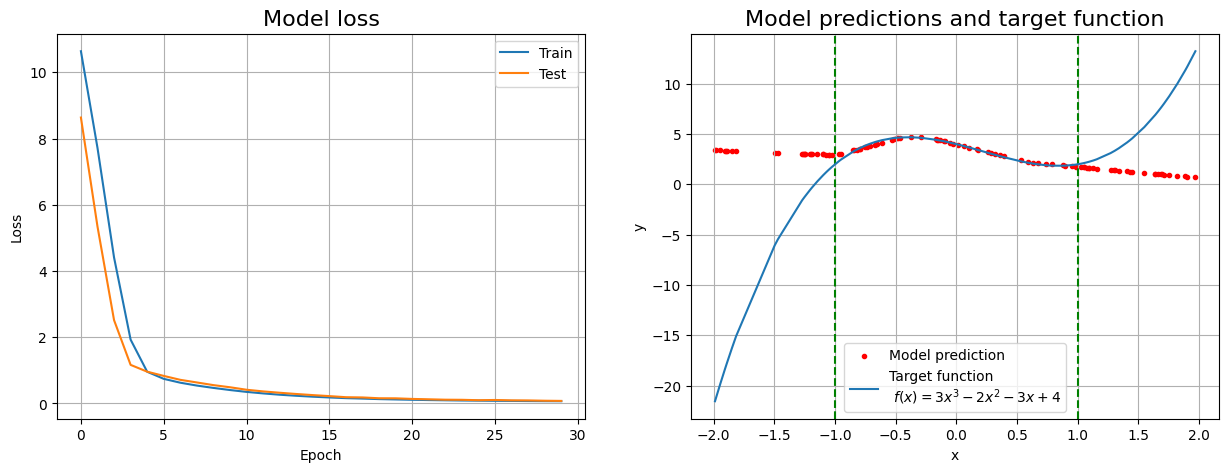

In [34]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()


# Compare the model prediction with the target function

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = model.predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()